# Name prediction Bigram Analysis

### Importing Data

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

### Data Analysis

In [3]:
print('Total Numebr of words in our dataset :', len(words))

Total Numebr of words in our dataset : 32033


In [4]:
print('Minimum number of alphabets in a word in our dataset: ', min(len(word) for word in words))
print('Maximum number of alphabets in a word in our dataset: ', max(len(word) for word in words))

Minimum number of alphabets in a word in our dataset:  2
Maximum number of alphabets in a word in our dataset:  15


## Bigram Analysis

### Basic Sample Code

Now, what we are trying to do is we are trying to break each individual word into many bigrams, and seeing what generally comes after a character. We do this with the following sample code:

In [5]:
print('First Word: ', words[:1])
print('Bigrams of the first word: ')
for w in words[: 1]:
    for ch1, ch2 in zip(w , w[1:]):
        print(ch1, '-->', ch2)

First Word:  ['emma']
Bigrams of the first word: 
e --> m
m --> m
m --> a


We need to add something to define when the word is starting and when the word is ending, and we will do it by adding tags to each word at the start represented by &lt;S&gt; and the end represented by &lt;E&gt; using the following sample code:

In [6]:
print('First Word: ', words[:1])
print('Bigrams of the first word: ')
for w in words[: 1]:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word , word[1:]):
        print(ch1, '-->', ch2)

First Word:  ['emma']
Bigrams of the first word: 
<S> --> e
e --> m
m --> m
m --> a
a --> <E>


### Bigram Analysis using counting

So the simplest way to predict the next character as we want to do is just by counting the number of times one character after the other. We do this with the following code:

In [7]:
dict_bigram = {}
for w in words[: 5]:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word , word[1:]):
        bigram = (ch1, ch2)
        dict_bigram[bigram] = dict_bigram.get(bigram, 0) + 1

dict_bigram

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 5,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 2,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1,
 ('<S>', 'i'): 1,
 ('i', 's'): 1,
 ('s', 'a'): 1,
 ('a', 'b'): 1,
 ('b', 'e'): 1,
 ('e', 'l'): 1,
 ('l', 'l'): 1,
 ('l', 'a'): 1,
 ('<S>', 's'): 1,
 ('s', 'o'): 1,
 ('o', 'p'): 1,
 ('p', 'h'): 1,
 ('h', 'i'): 1}

Let's do this for all the words now.

In [8]:
dict_bigram = {}

for w in words:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word , word[1:]):
        bigram = (ch1, ch2)
        dict_bigram[bigram] = dict_bigram.get(bigram, 0) + 1

In [9]:
sorted(dict_bigram.items(), key = lambda key_value : -key_value[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

We can use dictionary, but using a tensor is much more efficient so we are going to use a tensor in order to manipulate the data going forward using Pytorch. We are also going to replace the special tokens with just a '.'

In [10]:
import torch

In [11]:
# we will make a 28x28 tensor because we have 26 alphabets of english, and 1 special token

N = torch.zeros((27, 27), dtype = torch.int32)

In [12]:
# we will make a look up table for conversion of alphabets to integers

chars = sorted(list(set(''.join(words))))  # all of our characters a-z
stoi = {s:i + 1 for i, s in enumerate(chars)}  # stoi -> string to integer
stoi['.'] = 0

In [13]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [14]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [15]:
for w in words:
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

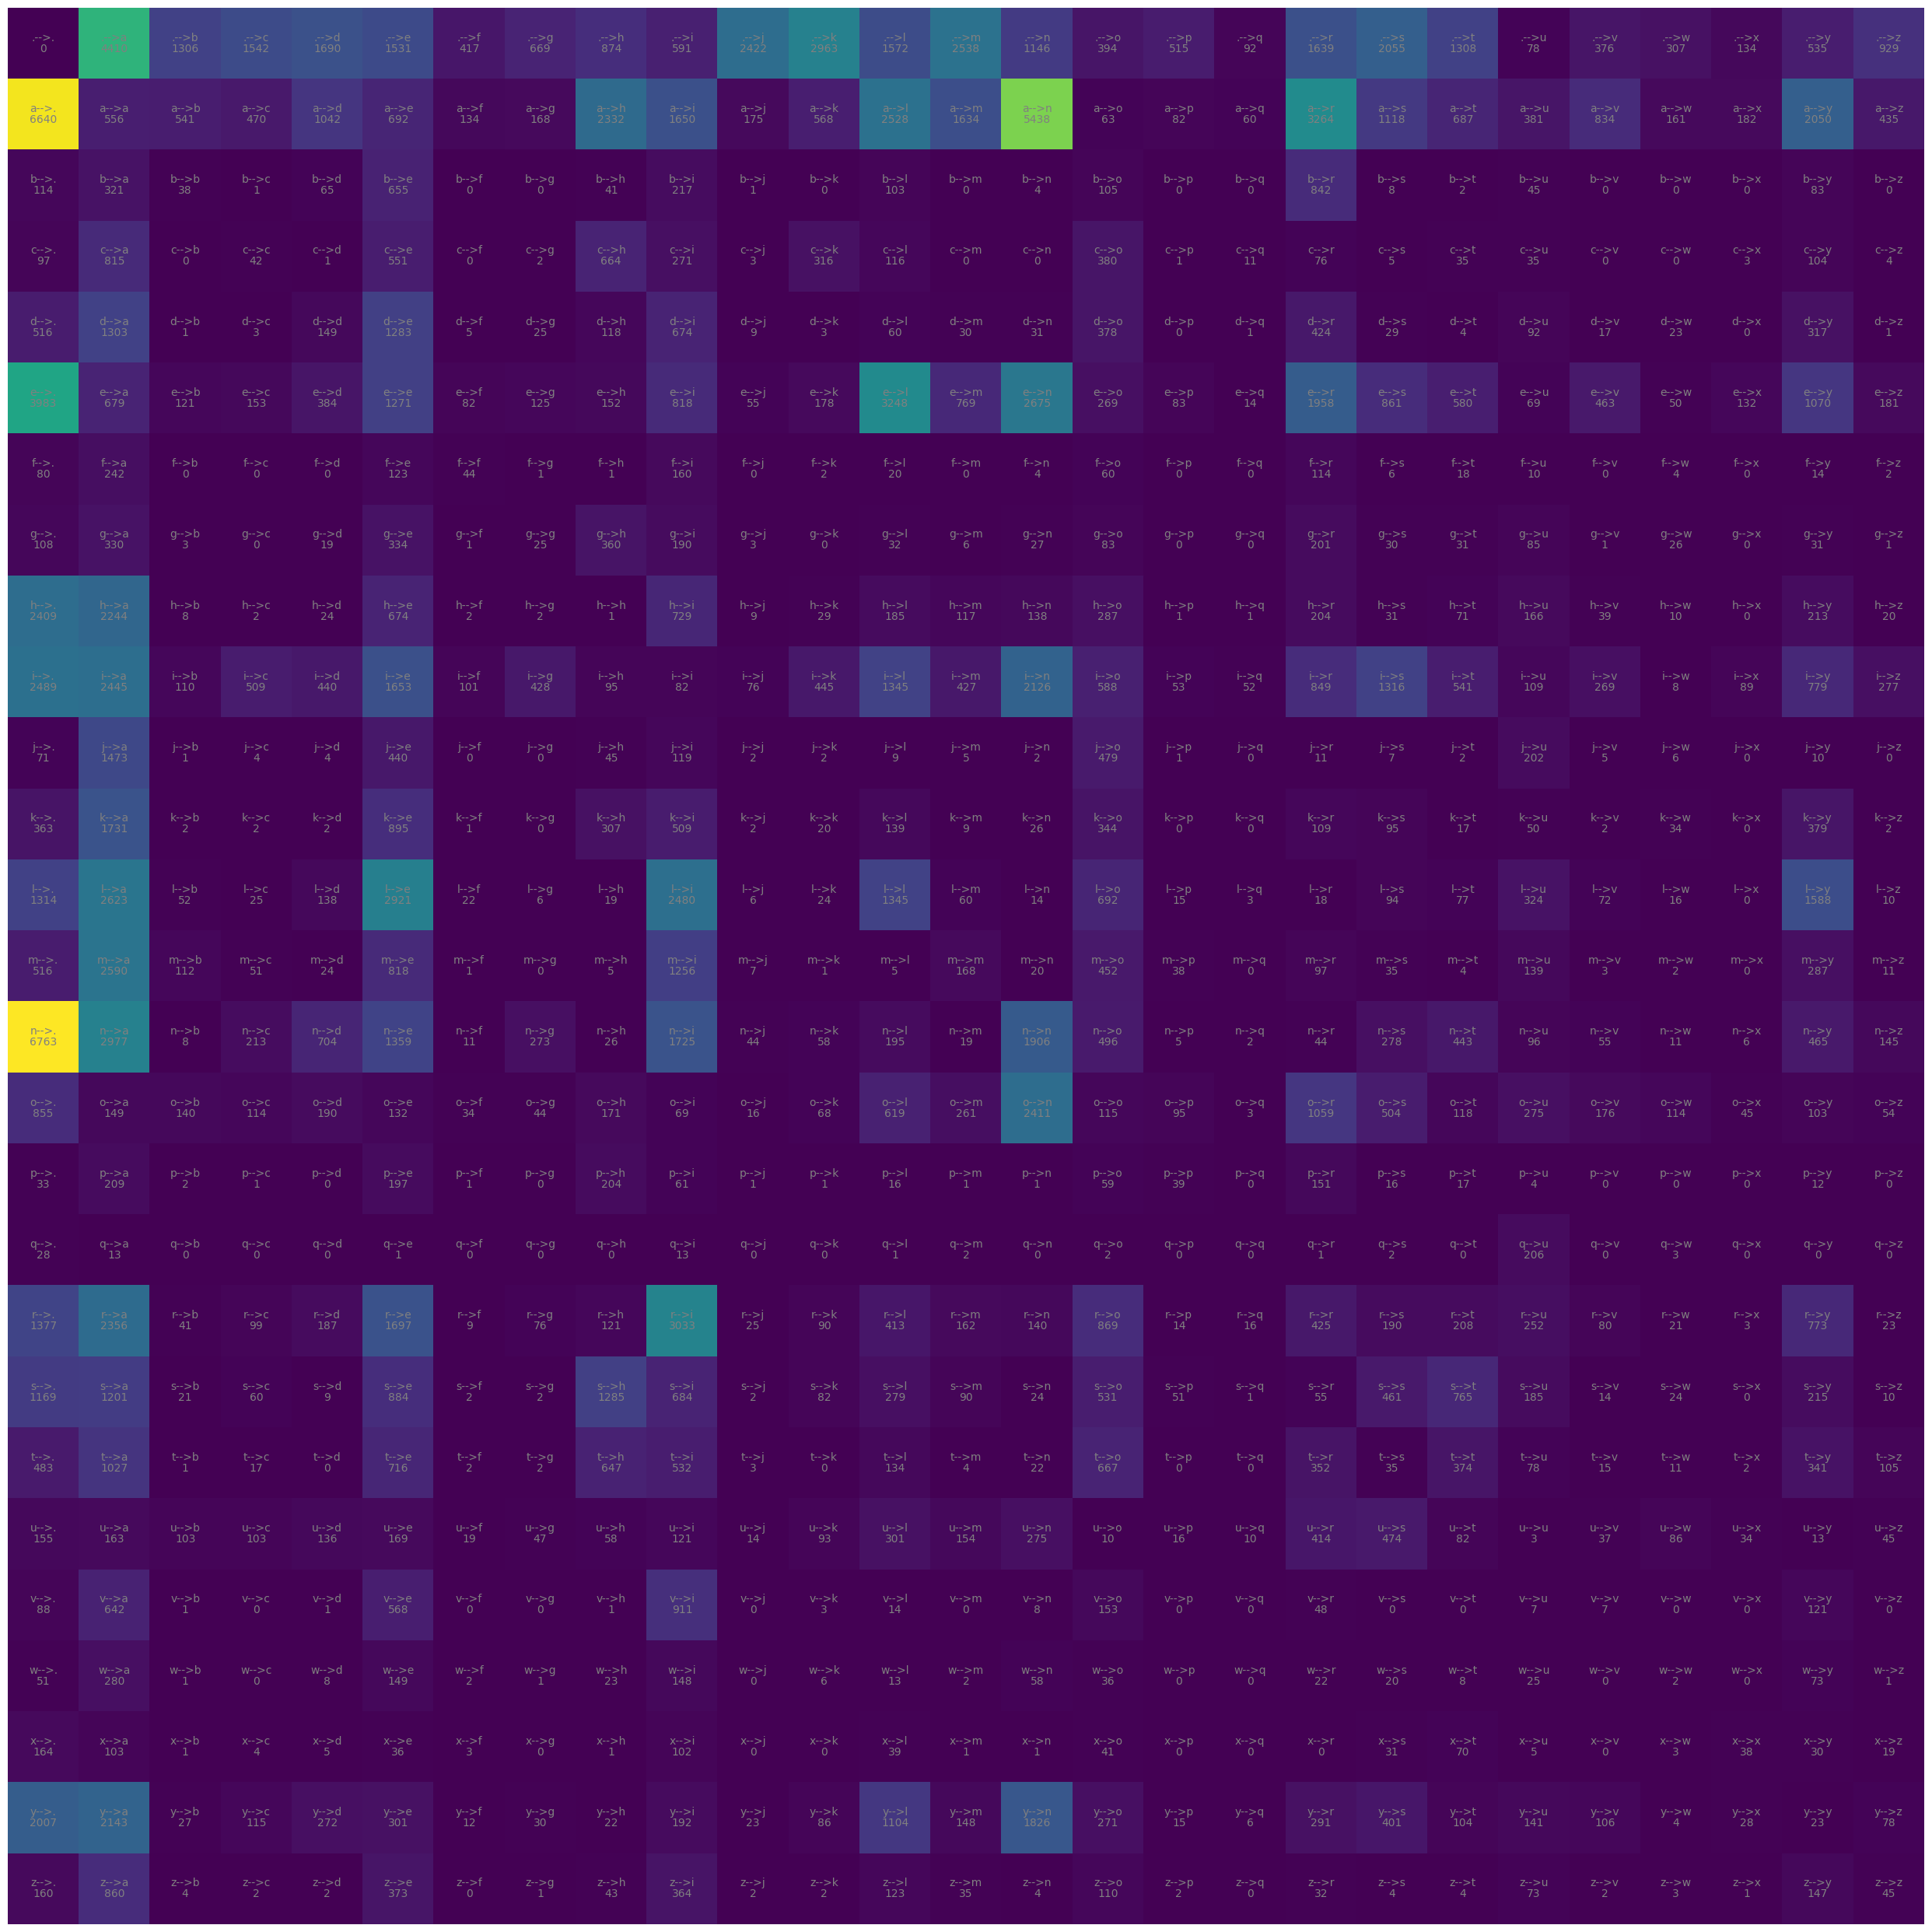

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 32))
plt.imshow(N)
for i in range(27):
    for j in range(27):
        chstr = itos[i] + '-->' + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')

plt.axis('off')
plt.show()

If we look at the diagram above, we can see that the first row depicts how many words start with the particular character and the first column depicts how many words end with a particular character. Rest of the map shows that how many words form a bigram. Now, we will get the normal distribution to convert our tensor into probabilities using torch multinomial feature.

In [17]:
p = N[0].float() / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
g = torch.Generator().manual_seed(532432)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
ix

14

In [19]:
itos[ix]

'n'

In [20]:
P = (N + 1).float() # model smoothing -> If we have zero in some places, loss can shoot up to infinity if we see an unknown sequence
P /= P.sum(1, keepdims = True)

In [21]:
import random

for i in range(10):
    
    random_seed = random.randint(1000, 10000000) # random seed for torch generator
    g = torch.Generator().manual_seed(random_seed) # random sample generator
    ix = 0 # initial starting array
    name = [] # array of selected alphabets
    while True:

        # p = N[ix].float() # converting int to float
        # p = p / p.sum()  # p is normalized  

        p = N[ix].float() # more efficient way

        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()  # generating the random number for the current alphabet
        if ix == 0:  # if we get a zero, that means we get a ., which represents either the end or the start
            break 
        name.append(itos[ix])

    print(''.join(name))  # printing our name

iy
ssaneshiolisly
jela
a
lcayal
kyannian
ja
ah
nn
ben


As expected, the results are terrible. But to see that the results actually make some sense, let's see what the results would look like if we have equal probability for all the alphabets in our p tensor.

In [22]:
for i in range(10):
    
    random_seed = random.randint(1000, 10000000) # random seed for torch generator
    g = torch.Generator().manual_seed(random_seed) # random sample generator
    ix = 0 # initial starting array
    name = [] # array of selected alphabets
    while True:
        # p = N[ix].float() # converting int to float
        # p = p / p.sum()  # p is normalized  

        p = torch.ones(27, dtype = torch.float32) / 27.0  # equal probability for all the alphabets and tokens

        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()  # generating the random number for the current alphabet
        if ix == 0:  # if we get a zero, that means we get a ., which represents either the end or the start
            break 
        name.append(itos[ix])

    print(''.join(name))  # printing our name

muweawvukmwxwnhzaqhxmmrlot
obj
jubrjhnmfjphwmsvyrnkth
zhkhcgoqopvizplqzhzyjtivgmnawaqhy
pveehrvxqh
kvseqv
r
krjhimsnt
tvekxcaswgygqzhtwkorzbglamsojizafruzbynuowlfidwv
zizeqexxgijjatgfvsgzwldbi


As we can see, our previous bigram model, was bad, but it had some logic behind it because the results we have now are way worse. Now let's calculate the loss function or average negative log likelihood of our current model.

In [23]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1} --> {ch2} : {prob : .4f} {logprob:.4f}')
        n += 1


print(f'Log Likelihood : {log_likelihood}')
print(f'Negative Log Likelihood : {-log_likelihood}')
print(f'Average Negative Log Likelihood : {-log_likelihood / n}')  # our loss function

. --> e :  0.0478 -3.0410
e --> m :  0.0377 -3.2793
m --> m :  0.0253 -3.6753
m --> a :  0.3885 -0.9454
a --> . :  0.1958 -1.6305
. --> o :  0.0123 -4.3965
o --> l :  0.0779 -2.5526
l --> i :  0.1774 -1.7293
i --> v :  0.0152 -4.1845
v --> i :  0.3508 -1.0476
i --> a :  0.1380 -1.9807
a --> . :  0.1958 -1.6305
. --> a :  0.1376 -1.9835
a --> v :  0.0246 -3.7041
v --> a :  0.2473 -1.3971
a --> . :  0.1958 -1.6305
Log Likelihood : -38.80856704711914
Negative Log Likelihood : 38.80856704711914
Average Negative Log Likelihood : 2.4255354404449463


As we can see, we want the log probability of the a sequence to be as less as possible for a better model. Now, we want to reduce our loss function and bring to as close to zero as possible. Let's run this over the entire dataset to get the accurate results.

In [24]:
log_likelihood = 0.0
n = 0
for w in words:
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1


print(f'Log Likelihood : {log_likelihood}')
print(f'Negative Log Likelihood : {-log_likelihood}')
print(f'Average Negative Log Likelihood : {-log_likelihood / n}')  # our loss function

Log Likelihood : -559951.5625
Negative Log Likelihood : 559951.5625
Average Negative Log Likelihood : 2.4543561935424805


We can also evaluate the probability of an individual word, for eg. let's take my name 'Tanmay' and see it's probability through our loss. The loss should be high as dataset contains names from the US orign.

In [25]:
sample_log_likelihood = 0.0
n = 0
for w in ['tanmay']:
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        sample_log_likelihood += logprob
        n += 1


print(f'Log Likelihood : {sample_log_likelihood}')
print(f'Negative Log Likelihood : {-sample_log_likelihood}')
print(f'Average Negative Log Likelihood : {-sample_log_likelihood / n}')  # our loss function

Log Likelihood : -18.88142204284668
Negative Log Likelihood : 18.88142204284668
Average Negative Log Likelihood : 2.6973459720611572


Loss is ok, I expected it to be higher tbh, like in the range 3-4. Now let's test a case in which we have a word that does not exist and test it's loss.

In [26]:
sample_log_likelihood = 0.0
n = 0
for w in ['fjnvisjbdcoajc']:
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        sample_log_likelihood += logprob
        print(f'{ch1} --> {ch2} : {prob : .4f} {logprob:.4f}')
        n += 1


print(f'Log Likelihood : {sample_log_likelihood}')
print(f'Negative Log Likelihood : {-sample_log_likelihood}')
print(f'Average Negative Log Likelihood : {-sample_log_likelihood / n}')  # our loss function

. --> f :  0.0130 -4.3399
f --> j :  0.0011 -6.8373
j --> n :  0.0010 -6.8831
n --> v :  0.0031 -5.7923
v --> i :  0.3508 -1.0476
i --> s :  0.0743 -2.5998
s --> j :  0.0004 -7.9051
j --> b :  0.0007 -7.2886
b --> d :  0.0247 -3.7009
d --> c :  0.0007 -7.2304
c --> o :  0.1071 -2.2344
o --> a :  0.0188 -3.9717
a --> j :  0.0052 -5.2610
j --> c :  0.0017 -6.3723
c --> . :  0.0275 -3.5923
Log Likelihood : -75.05668640136719
Negative Log Likelihood : 75.05668640136719
Average Negative Log Likelihood : 5.00377893447876


We will get a high probability as f -> j has an zero chance of happening, making the overall word impossible to create. But, when we smoothed our model, we added a fake count as to avoid getting infinite loss in cases like this.

## Neural Network Approach

For a neural network based approach, we will need a training dataset. Now, how we will make this dataset is by appending the first element of a bigram to the xs list, and then using the correct label for it in the ys list.

In [47]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


We will one-hot encode both our datasets

In [48]:
X_encoded = torch.nn.functional.one_hot(xs, num_classes = 27).float()

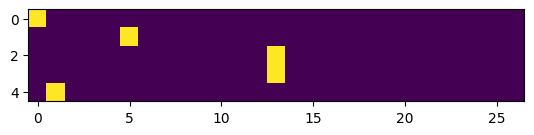

In [49]:
plt.imshow(X_encoded[:10])

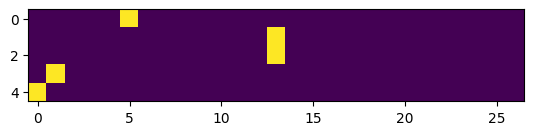

In [50]:
y_encoded = torch.nn.functional.one_hot(ys, num_classes = 27).float()
plt.imshow(y_encoded[:10])

In [51]:
W = torch.randn([27, 27]) # 27 neurons
W.T

tensor([[ 9.0164e-02, -7.7552e-01,  2.0180e-01,  6.2728e-01, -4.1853e-01,
          1.3265e-01, -5.3952e-01, -1.6896e+00, -1.5107e-01,  4.3789e-01,
          2.0040e+00, -2.7476e+00,  8.2501e-01,  1.4898e+00,  7.1625e-03,
         -1.3073e+00, -1.9236e-01, -8.1595e-01,  1.1499e+00,  7.8508e-01,
         -7.8566e-01, -6.9183e-01,  6.4885e-01,  6.0171e-01, -9.6628e-01,
          5.0609e-01,  6.9241e-01],
        [ 1.0880e+00,  1.3376e+00,  2.3270e+00,  1.0117e-01, -3.2330e-01,
         -1.2327e+00,  6.2096e-01, -8.9598e-01, -9.6831e-01,  1.5051e-01,
         -1.6692e+00,  2.2657e-01,  1.9645e-01, -4.1538e-01, -6.3392e-01,
          5.6490e-01,  7.0551e-01, -1.6996e+00, -8.2034e-01,  1.1922e+00,
         -1.6627e+00, -1.7151e+00, -5.3118e-01,  1.3477e+00,  1.3070e+00,
         -3.2613e-01, -5.2709e-01],
        [-7.1481e-01, -1.2110e-01, -9.2293e-01,  1.4480e+00,  9.5172e-01,
          1.0704e+00, -3.0513e-01, -9.9356e-01,  1.1859e+00,  1.6340e+00,
          1.1547e+00,  1.2712e+00, -1.69

In [57]:
(X_encoded @ W)[3, 13]
# what this does is it gives us the rate at which the 13th neuron is firing with
# respect to the third input

tensor(1.6505)

In [64]:
(X_encoded[3]*W[:, 13]).sum()
# same as matrix multiplication

tensor(1.6505)

In [66]:
logits = (X_encoded @ W) # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims = True)
probs

tensor([[0.0284, 0.0771, 0.0127, 0.1098, 0.0118, 0.0090, 0.0185, 0.0858, 0.0291,
         0.0346, 0.0533, 0.0221, 0.0241, 0.0074, 0.0381, 0.0159, 0.0563, 0.0088,
         0.0096, 0.1154, 0.0450, 0.0244, 0.0274, 0.0392, 0.0510, 0.0330, 0.0121],
        [0.0327, 0.0083, 0.0835, 0.0452, 0.1356, 0.0447, 0.0026, 0.0070, 0.0026,
         0.0374, 0.0110, 0.0269, 0.1222, 0.0777, 0.0248, 0.0251, 0.0103, 0.0072,
         0.0211, 0.0925, 0.0133, 0.0132, 0.0195, 0.0329, 0.0206, 0.0530, 0.0292],
        [0.0722, 0.0107, 0.0246, 0.0027, 0.0247, 0.2465, 0.0206, 0.0094, 0.0366,
         0.0014, 0.0193, 0.0186, 0.0060, 0.0848, 0.0165, 0.0148, 0.1386, 0.0216,
         0.0192, 0.0088, 0.0010, 0.0366, 0.0384, 0.0425, 0.0028, 0.0364, 0.0449],
        [0.0722, 0.0107, 0.0246, 0.0027, 0.0247, 0.2465, 0.0206, 0.0094, 0.0366,
         0.0014, 0.0193, 0.0186, 0.0060, 0.0848, 0.0165, 0.0148, 0.1386, 0.0216,
         0.0192, 0.0088, 0.0010, 0.0366, 0.0384, 0.0425, 0.0028, 0.0364, 0.0449],
        [0.0075, 0.0622,

In [69]:
probs[0].sum() #every row sums to 1 as normalized

tensor(1.0000)

In [70]:
probs.shape

torch.Size([5, 27])

In [76]:
# loss function

loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.8307)

## Summarize

In [87]:
random_seed = random.randint(1000, 10000000) # random seed for torch generator
g = torch.Generator().manual_seed(random_seed) # random sample generator
W = torch.randn((27, 27), generator = g, requires_grad = True) 

In [104]:
# forward pass

x_enc = torch.nn.functional.one_hot(xs, num_classes = 27).float() # input to one hot
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True) # prob for next char
loss = -probs[torch.arange(5), ys].log().mean()

In [105]:
loss

tensor(3.3789, grad_fn=<NegBackward0>)

In [106]:
# backward pass

W.grad = None # gradient set to zero
loss.backward()

In [107]:
W.data += -0.1*W.grad

## All the words

In [110]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
random_seed = random.randint(1000, 10000000) # random seed for torch generator
g = torch.Generator().manual_seed(random_seed) # random sample generator
W = torch.randn((27, 27), generator = g, requires_grad = True) 

In [116]:
num = xs.nelement()

In [128]:
(W**2).mean() # regularization term

tensor(3.7499, grad_fn=<MeanBackward0>)

In [125]:
for iter in range(1000):

    # forward pass
    x_enc = torch.nn.functional.one_hot(xs, num_classes = 27).float() # input to one hot
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims = True) # prob for next char
    loss = -probs[torch.arange(num), ys].log().mean() # + 0.01 * (W**2).mean() -> regularization
    print(loss.item())

    #backward pass
    W.grad = None 
    loss.backward()

    # update
    W.data += -50*W.grad

2.455254316329956
2.4552531242370605
2.455251693725586
2.4552505016326904
2.455249071121216
2.4552478790283203
2.455246686935425
2.45524525642395
2.4552440643310547
2.45524263381958
2.4552414417266846
2.455240488052368
2.4552388191223145
2.455237865447998
2.4552364349365234
2.455235004425049
2.4552340507507324
2.455232858657837
2.4552314281463623
2.455230236053467
2.455228805541992
2.4552276134490967
2.4552266597747803
2.455225706100464
2.4552245140075684
2.4552228450775146
2.455221652984619
2.4552204608917236
2.4552195072174072
2.4552180767059326
2.455216646194458
2.4552159309387207
2.455214500427246
2.4552130699157715
2.455212116241455
2.4552106857299805
2.455209493637085
2.4552085399627686
2.455207109451294
2.4552056789398193
2.455204725265503
2.4552035331726074
2.455202579498291
2.4552013874053955
2.4552001953125
2.4551990032196045
2.455197811126709
2.4551963806152344
2.455195426940918
2.4551942348480225
2.455192804336548
2.4551918506622314
2.455190658569336
2.4551892280578613
2.45

In [132]:
random_seed = random.randint(1000, 10000000) # random seed for torch generator
g = torch.Generator().manual_seed(random_seed) # random sample generator

for i in range(5):

    out = []
    ix = 0
    while True:
        x_enc = torch.nn.functional.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = x_enc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims = True)
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
                                            

cyn.
kari.
fi.
bry.
finnn.
